In [1]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

In [2]:
# Import data
# !wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [4]:
cat_columns = ['sex', 'smoker', 'region']   
dataset[cat_columns] = dataset[cat_columns].astype('category')
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

dataset.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
expenses    float64
dtype: object

In [45]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
train_dataset.head()

,age,sex,bmi,children,smoker,region
603,64,0,39.1,3,0,2
712,43,0,30.7,2,0,1
527,51,0,25.8,1,0,3
294,25,1,26.8,3,0,3
1308,25,0,30.2,0,1,3


In [46]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))
print(normalizer.mean.numpy())

[[38.78972     0.5        30.575794    1.0962617   0.19719626  1.5       ]]


In [47]:
model = keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (1070, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [48]:

# model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['mae', 'mse'])
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['mae', 'mse'])
epochs = 100
history = model.fit(
    train_dataset,
    train_labels,
    epochs=epochs,
    verbose=True,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 245501344.0000 - mae: 11262.6143 - mse: 245501344.0000 - val_loss: 137578480.0000 - val_mae: 7679.9902 - val_mse: 137578480.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 108377184.0000 - mae: 6759.7910 - mse: 108377184.0000 - val_loss: 71010264.0000 - val_mae: 4786.7720 - val_mse: 71010264.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61276672.0000 - mae: 4507.1875 - mse: 61276672.0000 - val_loss: 48280912.0000 - val_mae: 4143.3545 - val_mse: 48280912.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40115796.0000 - mae: 3754.9893 - mse: 40115796.0000 - val_loss: 40709564.0000 - val_mae: 4149.9253 - val_mse: 40709564.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44135500.0000 - mae: 4283.5156 - mse: 44135500.0000 - val_loss: 38163220.0000 - val_mae: 4205.2241 - val_mse: 38163220.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39208540.0000 - mae

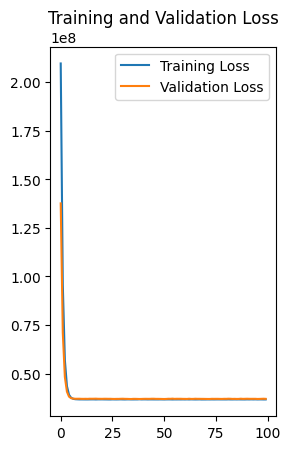

In [51]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

9/9 - 0s - 5ms/step - loss: 36879060.0000 - mae: 4298.4116 - mse: 36879060.0000
Testing set Mean Abs Error: 4298.41 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


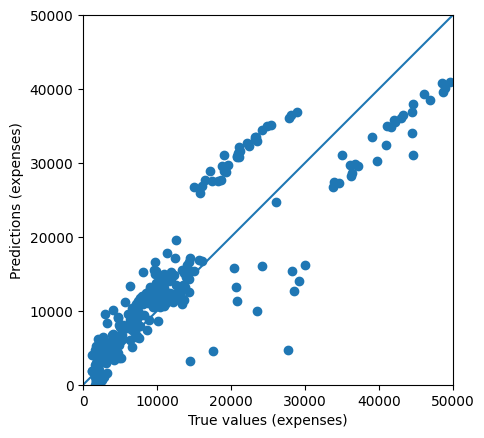

In [52]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
